In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('/Users/hp/Desktop/DEU CENG/4/Machine Learning/PROJECT/2012-18_officialBoxScore.csv')

In [4]:
df.shape

(44284, 119)

In [5]:
pd.set_option('display.max_columns',130)
df.head(10) #Lots of unnecessary data. One game appears as 6 rows. 

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptMin,opptDayOff,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,4

In [6]:
df.describe()

,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptMin,opptDayOff,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
count,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.00000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,4.428400e+04,44284.00000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.00000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,4.428400e+04,44284.00000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000
mean,241.794576,1.939730,102.293086,22.388447,14.365617,7.751784,4.862795,20.129392,84.10033,38.210302,0.455423,60.103739,29.641180,0.495743,23.996590,8.569122,0.354989,22.795299,17.303428,0.760117,10.543966,32.620901,43.164868,25.615934,25.675594,25.247855,25.030124,0.608278,0.092471,0.014023,0.003929,50.000000,58.494609,0.544515,0.506534,24.231275,75.768725,13.235477,8.092197,5.091908,8.239271,1.221723,76.251956,63.090755,107.059655,107.059655,3.449704e-18,0.43498,17.017897,1.701269,58.048581,241.794576,1.939730,102.293086,22.388447,14.365617,7.751784,4.862795,20.129392,84.10033,38.210302,0.455423,60.103739,29.641180,0.495743,23.996590,8.569122,0.354989,22.795299,17.303428,0.760117,10.543966,32.620901,43.164868,25.615934,25.675594,25.247855,25.030124,0.608278,0.092471,0.014023,0.003929,50.000000,58.494609,0.544515,0.506534,24.217889,75.782111,13.235477,8.092197,5.091908,8.239271,1.221723,76.251956,63.090755,107.059655,107.059655,-3.449704e-18,0.43498,17.017897,1.701269,58.048581,95.573082,94.873836
std,7.616808,1.070765,12.222973,5.076801,3.904487,2.924571,2.576983,4.336486,7.25922,5.024225,0.055205,8.600713,5.064327,0.068859,7.130665,3.563659,0.101928,7.422907,5.997142,0.104247,3.870097,5.344910,6.472703,5.679912,5.677737,5.729693,5.763391,2.594247,1.022303,0.375030,0.248806,5.254185,10.233849,0.061197,0.065478,7.588248,7.588248,3.474736,2.964674,2.695288,4.535443,0.153567,16.240931,13.433833,11.306581,11.306581,1.440956e+01,0.05190,3.245338,0.709822,28.522690,7.616808,1.070765,12.222973,5.076801,3.904487,2.924571,2.576983,4.336486,7.25922,5.024225,0.055205,8.600713,5.064327,0.068859,7.130665,3.563659,0.101928,7.422907,5.997142,0.104247,3.870097,5.344910,6.472703,5.679912,5.677737,5.729693,5.763391,2.594247,1.022303,0.

In [7]:
df = df[["teamAbbr","opptAbbr",
         "teamLoc", "teamRslt", "teamDayOff", "teamPTS","teamAST","teamTO",
         "teamSTL", "teamBLK", "teamPF", "teamFGA", "teamFGM", "teamFG%", 
         "team2PA", "team2PM", "team2P%", "team3PA", "team3PM", "team3P%", "teamFTA", "teamFTM", "teamFT%", "teamPPS","teamTRB",
         "teamTREB%","teamASST%","teamTS%","teamEFG%","teamOREB%","teamDREB%","teamTO%","teamSTL%","teamBLK%",
         "teamBLKR","teamPPS","teamFIC","teamFIC40","teamOrtg","teamDrtg","teamEDiff","teamPlay%","teamAR","teamAST/TO",
         "teamSTL/TO","teamORB","teamDRB","teamTRB","teamPTS1","teamPTS2","teamPTS3","teamPTS4","teamPTS5","teamPTS6",
         "teamPTS7","teamPTS8"]] # Drop opponent team's stats and match official's stats

In [8]:
df = df.drop_duplicates() # Remove redunduncy occured by Official Names.
df = df.reset_index(drop=True)
df.head(10) # there is still redunduncy. One match appers two times in the dataset.

,teamAbbr,opptAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamPPS,teamTRB,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8
0,WAS,CLE,Away,Loss,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,0.9333,39,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.250,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,18,21,39,24,15,23,22,0,0,0,0
1,CLE,WAS,Home,Win,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,1.1899,54,58.0645,61.1111,0.5300,0.5000,46.1538,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.000,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,18,36,54,31,19,24,20,0,0,0,0
2,BOS,MIA,Away,Loss,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,1.4267,41,53.2468,61.5385,0.6127,0.5600,18.4211,87.1795,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,7,34,41,25,29,22,31,0,0,0,0
3,MIA,BOS,Home,Win,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,1.5190,36,46.7532,58.1395,0.6446,0.5949,12.8205,81.5789,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,5,31,36,31,31,31,27,0,0,0,0
4,DAL,LAL,Away,Win,0,99,22,12,9,5,25,85,40,0.4706,70,35,0.5000,15,5,0.3333,18,14,0.7778,1.1647,40,46.5116,55.0000,0.5327,0.5000,22.5000,67.3913,11.4373,9.8276,5.4598,7.1429,1.1647,72.250,60.2083,108.1034,99.3678,8.7356,0.4545,17.3338,1.8333,75.0000,9,31,40,25,23,26,25,0,0,0,0
5,LAL,DAL,Home,Loss,0,91,24,14,6,5,21,77,38,0.4935,64,35,0.5469,13,3,0.2308,31,12,0.3871,1.1818,46,53.4884,63.1579,0.5020,0.5130,32.6087,77.5000,13.3792,6.5517,5.4598,7.8125,1.1818,70.375,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,15,31,46,29,17,20,25,0,0,0,0
6,DEN,PHI,Away,Loss,0,75,19,22,9,5,22,88,33,0.3750,70,29,0.4143,18,4,0.2222,11,5,0.4545,0.8523,54,53.4653,57.5758,0.4039,0.3977,32.6531,73.0769,19.1571,9.5368,5.2982,7.1429,0.8523,49.375,41.1458,79.4731,89.0099,-9.5368,0.3511,14.1961,0.8636,40.9091,16,38,54,22,16,14,23,0,0,0,0
7,PHI,DEN,Home,Win,0,84,18,16,13,11,14,85,30,0.3529,60,23,0.3833,25,7,0.2800,21,17,0.8095,0.9882,47,46.5347,60.0000,0.4457,0.3941,26.9231,67.3469,14.5138,13.7753,11.6561,18.3333,0.9882,70.125,58.4375,89.0099,79.4731,9.5368,0.3448,14.0362,1.1250,81.2500,14,33,47,25,21,19,19,0,0,0,0
8,IND,TOR,Away,Win,0,90,22,19,3,10,16,78,37,0.4744,67,32,0.4776,11,5,0.4545,16,11,0.6875,1.1538,46,52.2727,59.4595,0.5292,0.5064,25.0000,71.1538,18.2622,3.2764,10.9213,14.9254,1.1538,70.250,58.5417,98.2918,96.1075,2.1843,0.4205,17.4548,1.1579,15.7895,9,37,46,27,21,15,27,0,0,0,0
9,TOR,IND,Home,Loss,0,88,18,10,12,8,18,91,33,0.3626,74,27,0.3649,17,6,0.3529,19,16,0.8421,0.9670,42,47.7273,54.5455,0.4428,0.3956,28.8462,75.0000,9.1441,13.1056,8.7370,10.8108,0.9670,66.875,55.7292,96.1075,98.2918,-2.1843,0.3837,14.1332,1.8000,120.0000,15,27,42,25,23,23,17,0,0,0,0


In [9]:
droplist = [] # Rows that will be dropped
for i in range(0,len(df),2):
    droplist.append(i)

df = df.drop(df.index[droplist])
df = df.reset_index(drop=True)
df.head(10)

,teamAbbr,opptAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamPPS,teamTRB,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8
0,CLE,WAS,Home,Win,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,1.1899,54,58.0645,61.1111,0.5300,0.5000,46.1538,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.000,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,18,36,54,31,19,24,20,0,0,0,0
1,MIA,BOS,Home,Win,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,1.5190,36,46.7532,58.1395,0.6446,0.5949,12.8205,81.5789,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,5,31,36,31,31,31,27,0,0,0,0
2,LAL,DAL,Home,Loss,0,91,24,14,6,5,21,77,38,0.4935,64,35,0.5469,13,3,0.2308,31,12,0.3871,1.1818,46,53.4884,63.1579,0.5020,0.5130,32.6087,77.5000,13.3792,6.5517,5.4598,7.8125,1.1818,70.375,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,15,31,46,29,17,20,25,0,0,0,0
3,PHI,DEN,Home,Win,0,84,18,16,13,11,14,85,30,0.3529,60,23,0.3833,25,7,0.2800,21,17,0.8095,0.9882,47,46.5347,60.0000,0.4457,0.3941,26.9231,67.3469,14.5138,13.7753,11.6561,18.3333,0.9882,70.125,58.4375,89.0099,79.4731,9.5368,0.3448,14.0362,1.1250,81.2500,14,33,47,25,21,19,19,0,0,0,0
4,TOR,IND,Home,Loss,0,88,18,10,12,8,18,91,33,0.3626,74,27,0.3649,17,6,0.3529,19,16,0.8421,0.9670,42,47.7273,54.5455,0.4428,0.3956,28.8462,75.0000,9.1441,13.1056,8.7370,10.8108,0.9670,66.875,55.7292,96.1075,98.2918,-2.1843,0.3837,14.1332,1.8000,120.0000,15,27,42,25,23,23,17,0,0,0,0
5,DET,HOU,Home,Loss,0,96,21,16,12,4,15,79,35,0.4430,63,29,0.4603,16,6,0.3750,26,20,0.7692,1.2152,36,44.4444,60.0000,0.5307,0.4810,23.2558,68.4211,15.0319,12.6895,4.2298,6.3492,1.2152,70.000,58.3333,101.5159,111.0330,-9.5171,0.4118,16.4783,1.3125,75.0000,10,26,36,22,36,23,15,0,0,0,0
6,CHI,SAC,Home,Win,0,93,21,18,8,10,19,79,33,0.4177,70,31,0.4429,9,2,0.2222,33,25,0.7576,1.1772,46,53.4884,63.6364,0.4972,0.4304,32.5581,74.4186,16.1406,8.3382,10.4227,14.2857,1.1772,70.875,59.0625,96.9312,90.6776,6.2536,0.3976,15.8467,1.1667,44.4444,14,32,46,25,19,25,24,0,0,0,0
7,NO,SA,Home,Loss,0,95,26,15,7,6,20,80,35,0.4375,63,31,0.4921,17,4,0.2353,23,21,0.9130,1.1875,43,50.0000,74.2857,0.5271,0.4625,21.4286,77.2727,14.2694,7.3658,6.3136,9.5238,1.1875,74.875,62.3958,99.9650,104.1740,-4.2090,0.4070,19.8292,1.7333,46.6667,9,34,43,31,19,21,24,0,0,0,0
8,UTA,DAL,Home,Win,0,113,24,14,10,8,25,89,38,0.4270,75,32,0.4267,14,6,0.4286,42,31,0.7381,1.2697,61,60.3960,63.1579,0.5257,0.4607,38.4615,83.6735,11.5245,9.9526,7.9621,10.6667,1.2697,96.750,80.6250,112.4649,93.5549,18.9100,0.4578,16.4971,1.7143,71.4286,20,41,61,25,30,37,21,0,0,0,0
9,PHO,GS,Home,Loss,0,85,16,18,10,12,23,80,32,0.4000,59,28,0.4746,21,4,0.1905,22,17,0.7727,1.0625,44,47.3118,50.0000,0.4739,0.4250,25.5814,66.0000,16.7162,10.6621,12.7945,20.3390,1.0625,61.000,50.8333,90.6276,92.7600,-2.1324,0.3678,12.9366,0.8889,55.5556,11,33,44,21,21,25,18,0,0,0,0


In [10]:
df.shape

(7379, 56)

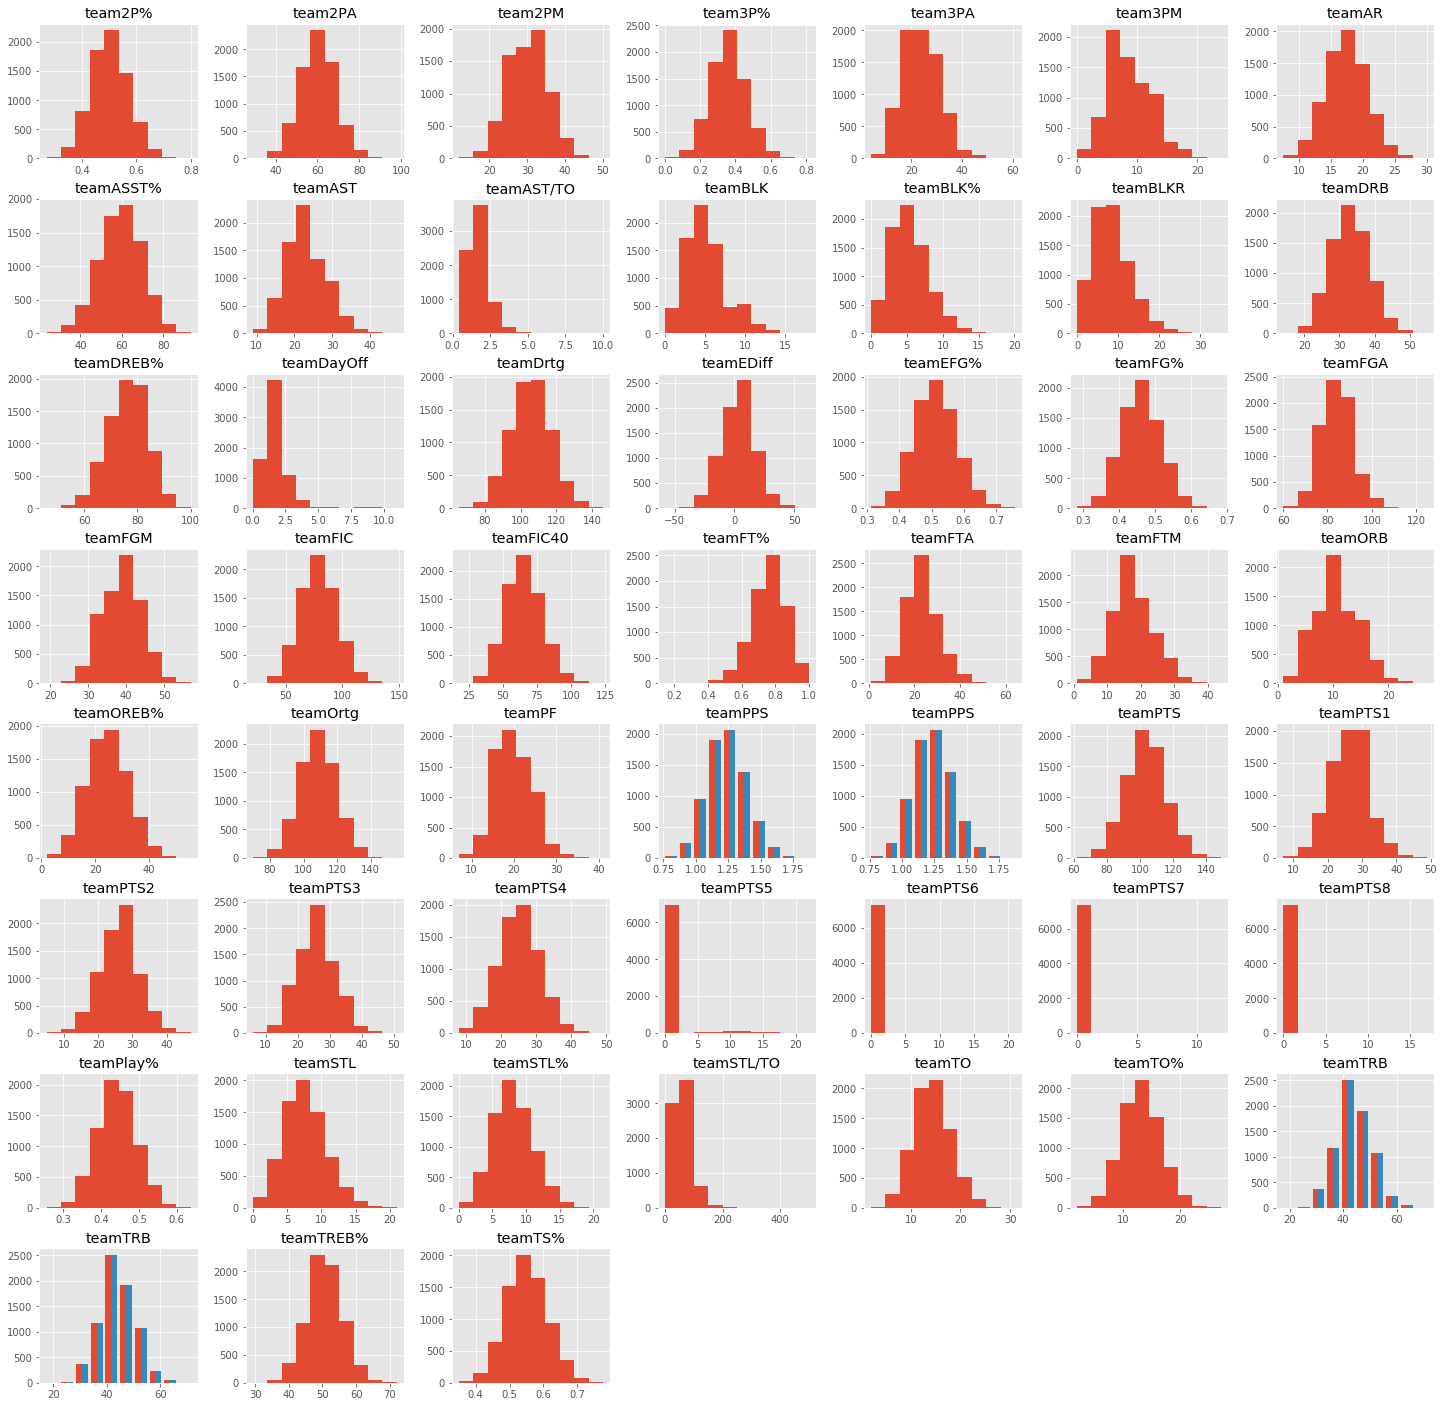

In [11]:
plt.style.use('ggplot')
pd.DataFrame.hist(df, figsize = [25,25]);

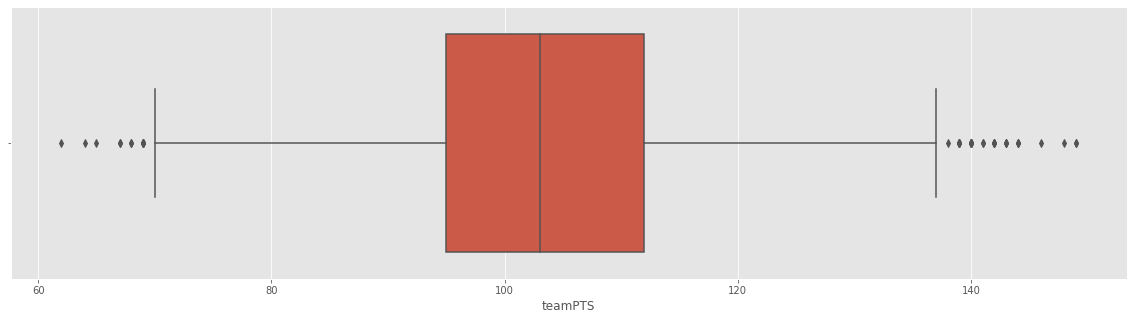

In [12]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.boxplot(x=df['teamPTS'])

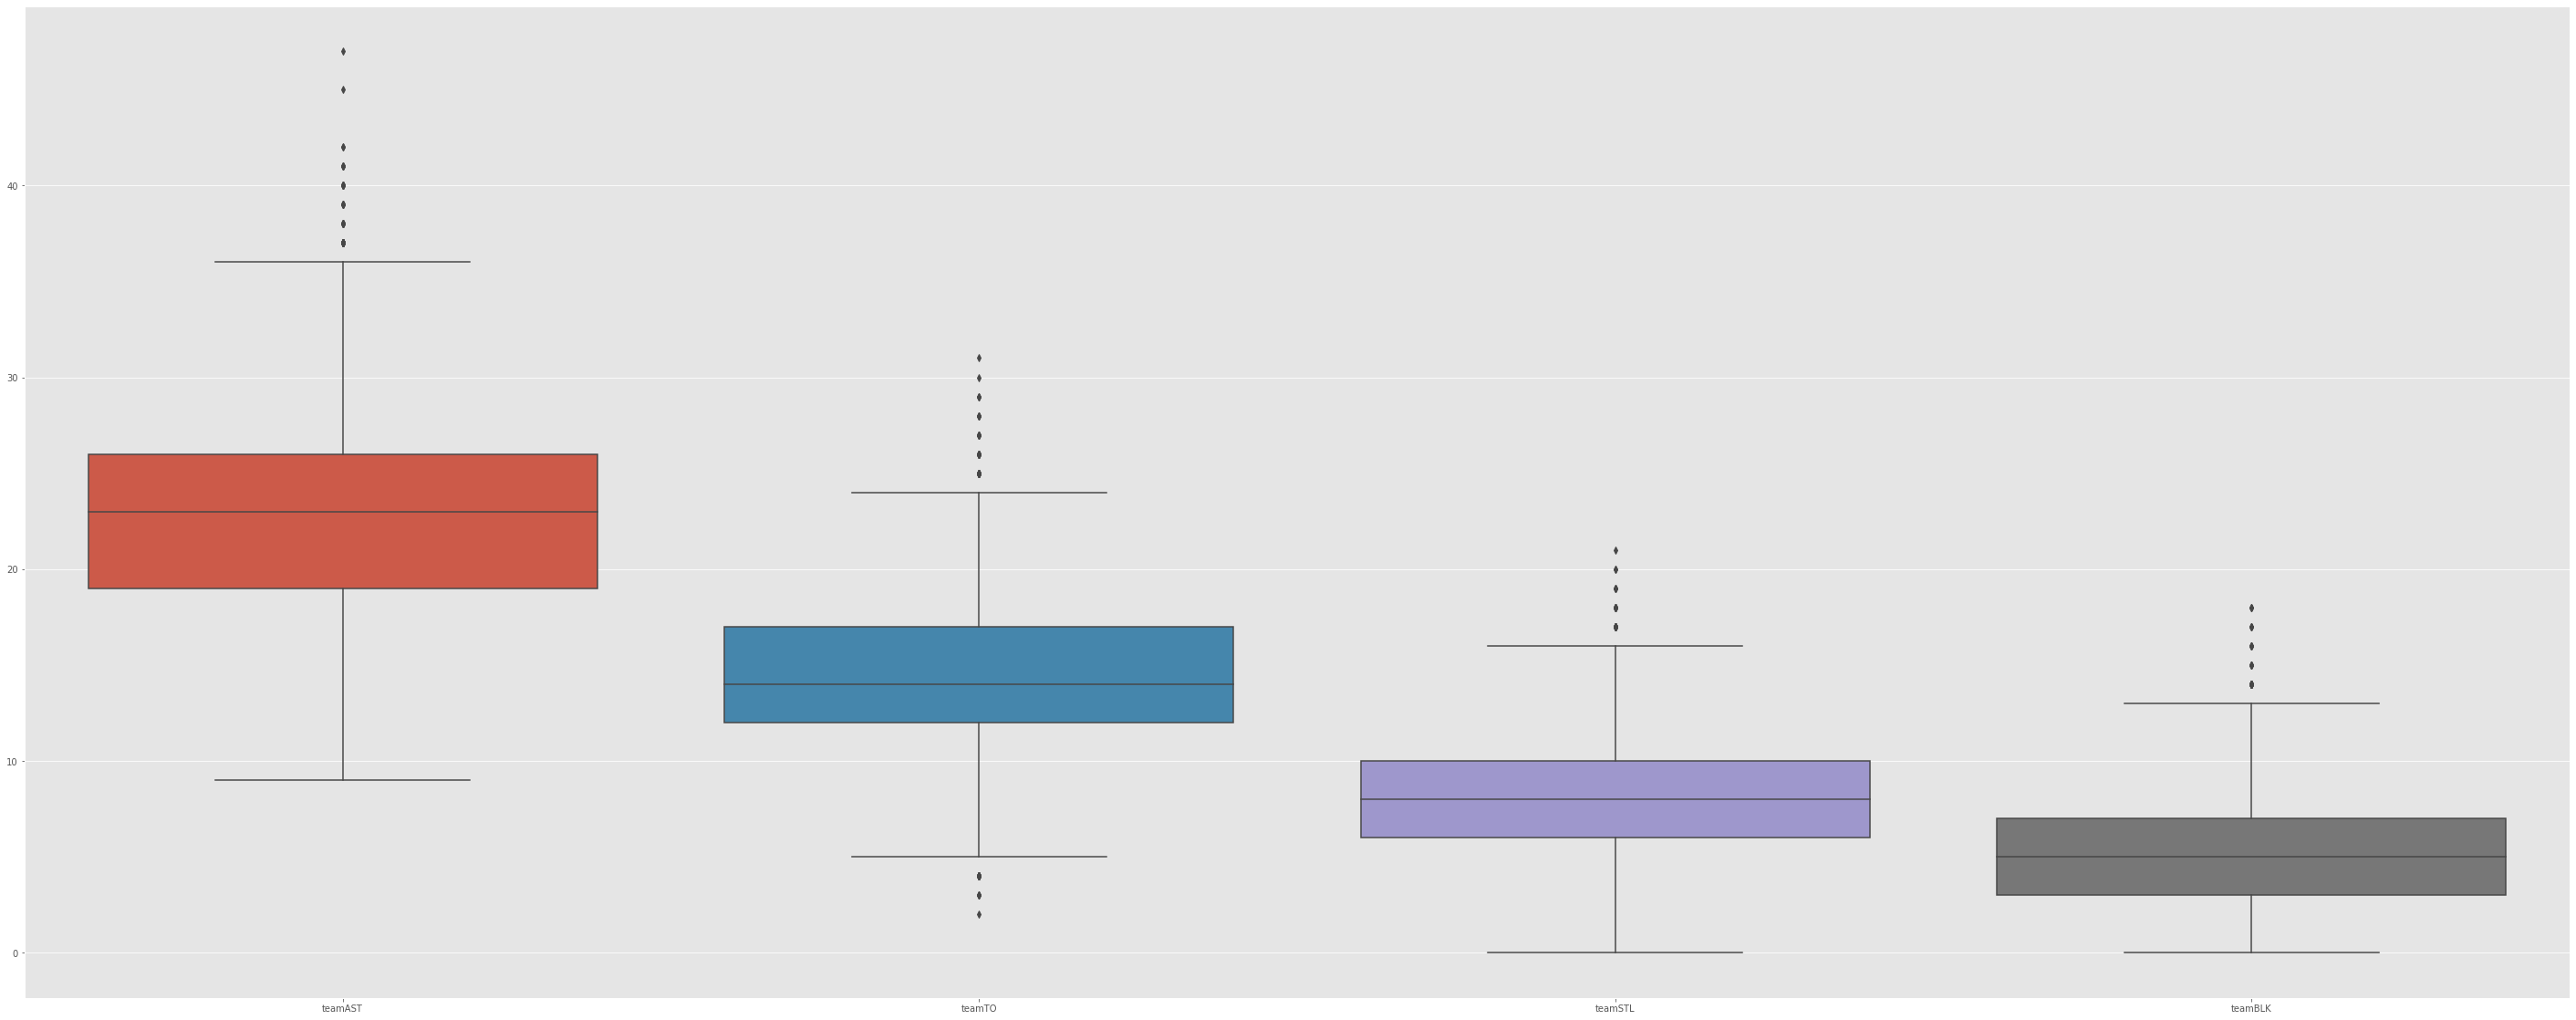

In [13]:
dfShow = df[["teamAST","teamTO","teamSTL", "teamBLK"]] #boxplots of most critical stats
plt.figure(figsize=(50,20))
sns.boxplot(data=dfShow)

In [14]:
mapping = {'Loss': 0, 'Win': 1}
# mapping the target win loss data to 1 0
df = df.replace({'teamRslt': mapping})

In [15]:
df = df[["teamRslt", "teamDayOff", "teamPTS","teamAST","teamTO",
         "teamSTL", "teamBLK", "teamPF", "teamFGA", "teamFGM", "teamFG%", 
         "team2PA", "team2PM", "team2P%", "team3PA", "team3PM", "team3P%", "teamFTA", "teamFTM", "teamFT%", "teamPPS","teamTRB",
         "teamTREB%","teamASST%","teamTS%","teamEFG%","teamOREB%","teamDREB%","teamTO%","teamSTL%","teamBLK%",
         "teamBLKR","teamPPS","teamFIC","teamFIC40","teamOrtg","teamDrtg","teamEDiff","teamPlay%","teamAR","teamAST/TO",
         "teamSTL/TO","teamORB","teamDRB","teamTRB","teamPTS1","teamPTS2","teamPTS3","teamPTS4","teamPTS5","teamPTS6",
         "teamPTS7","teamPTS8"]]

In [32]:
df.shape

(7379, 57)

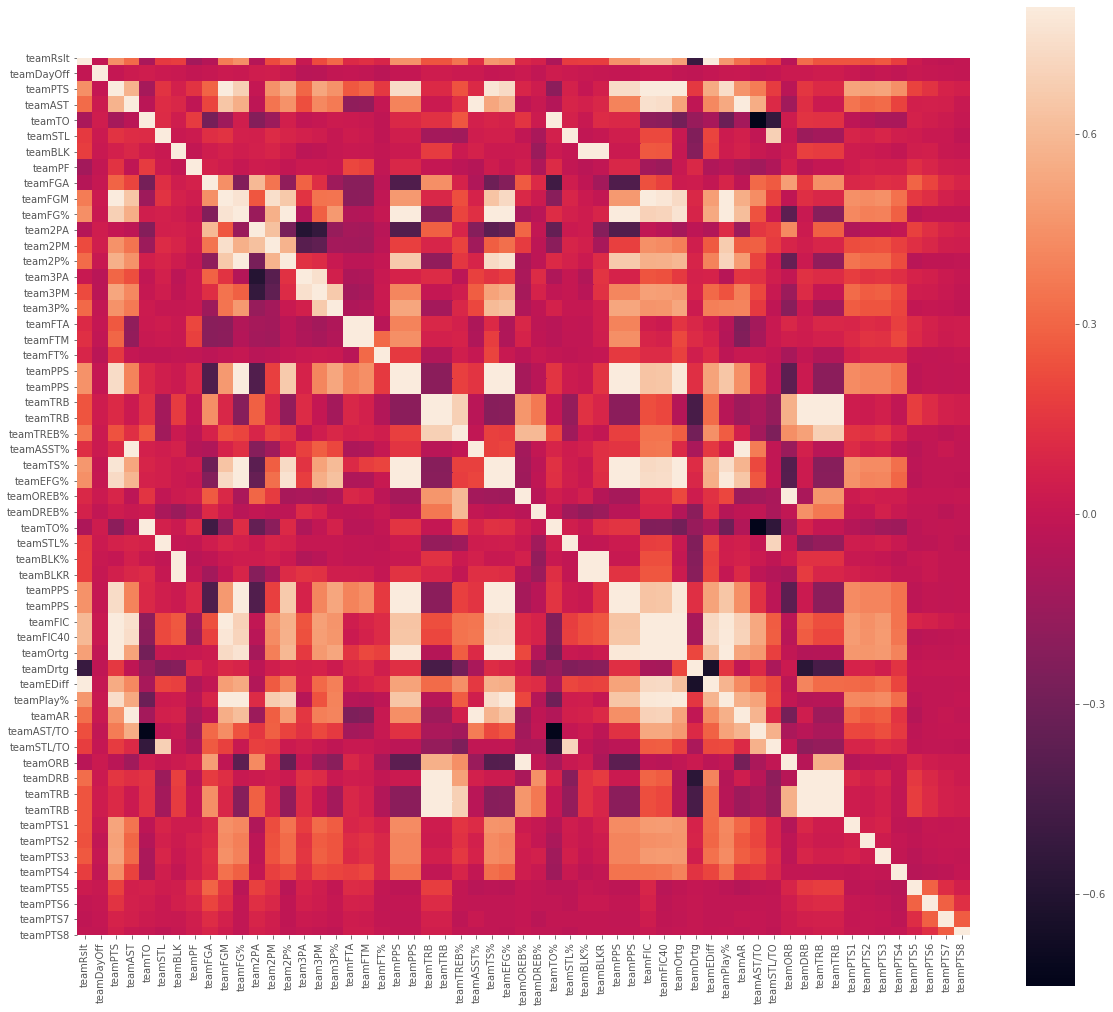

In [16]:
# Correlation Matrix
corrmat = df.corr() 
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(corrmat, vmax=.8, square=True)

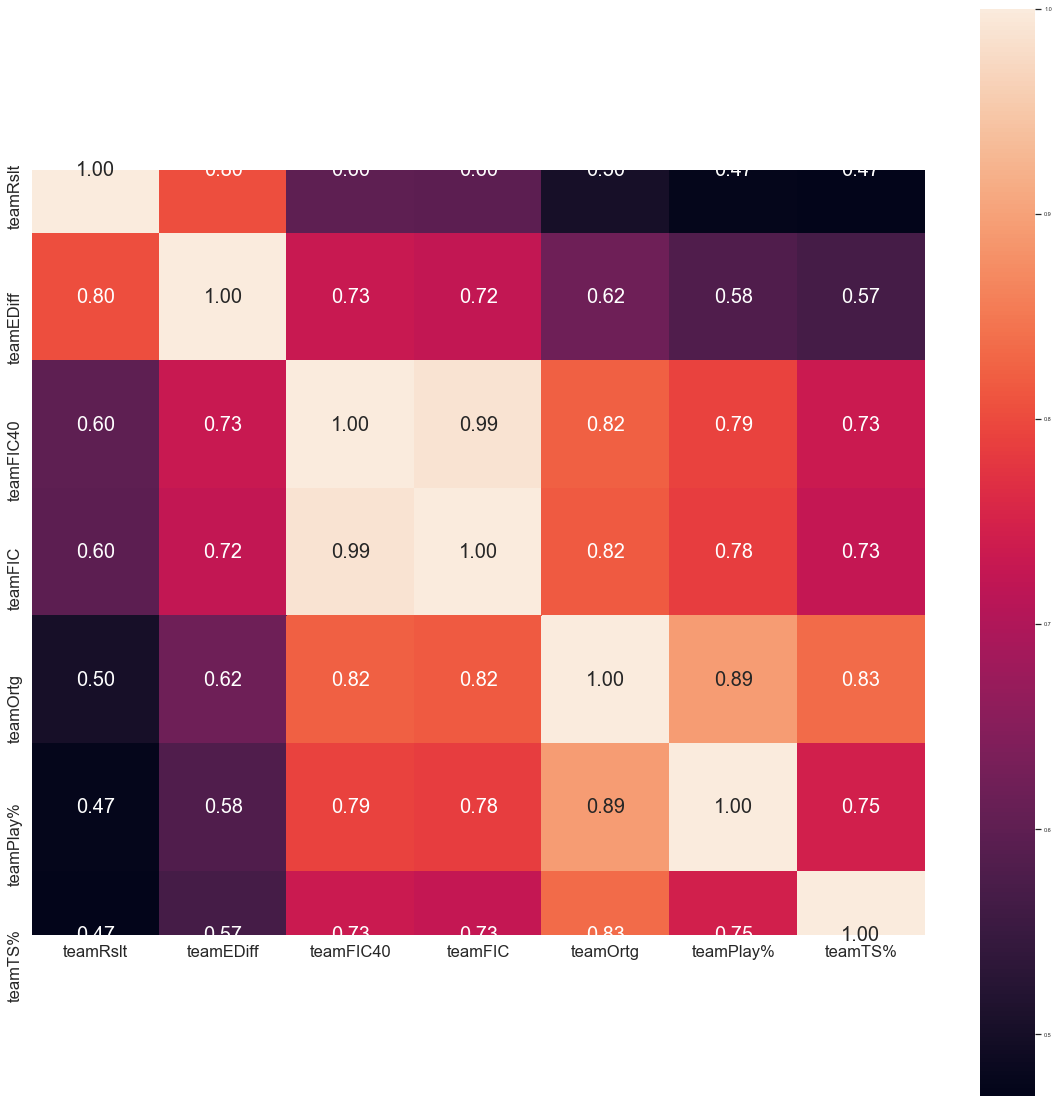

In [40]:
# A better look to matrix. Team Result's top 6 correlations
k = 7
cols = corrmat.nlargest(k, 'teamRslt')['teamRslt'].index
f, ax = plt.subplots(figsize=(20,20))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
df.isnull().values.any() # dataset is clean

False

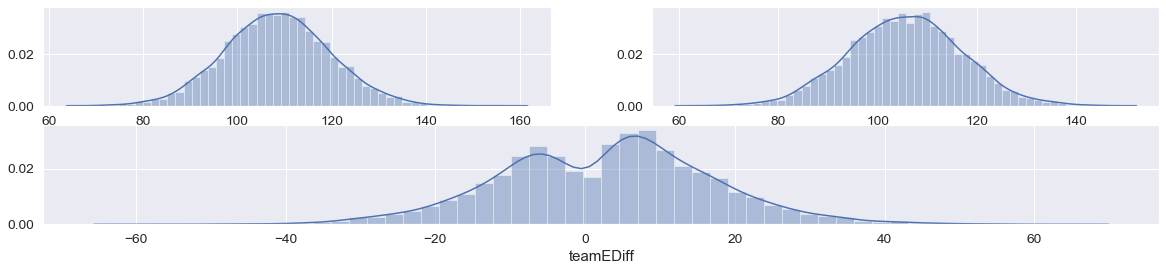

In [19]:
f = plt.figure(figsize=(20,4)) # Can be seen the relation between them
f.add_subplot(2,2,1)
sns.distplot(df['teamOrtg']) #Team Offensive Rating
f.add_subplot(2,2,2)
sns.distplot(df['teamDrtg']) #Team Defensive Rating
f.add_subplot(2,1,2)
sns.distplot(df['teamEDiff']) #Team Ortg - Drtg

In [20]:
y = df['teamRslt'].values # TEAM RESULTS (TARGET)
X = df.drop(columns = ['teamRslt']) # DATA TO BE TRAINED

(array([3054.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4325.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

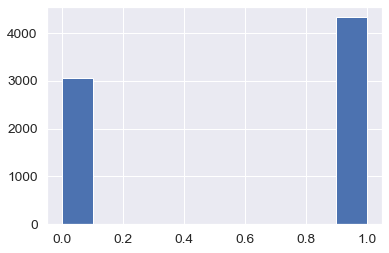

In [21]:
plt.hist(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
weights = ['uniform','distance']
# ‘uniform’ : All points in each neighborhood are weighted equally.
# ‘distance’ : weight points by the inverse of their distance.
n_neighbors = list(range(1,30))
p=[1,2]
# p = 1, manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
#Convert to dictionary
hyperparameters = dict(weights=weights, n_neighbors=n_neighbors, p=p)
knn_param = KNeighborsClassifier()
clf = GridSearchCV(knn_param, hyperparameters, cv=3) # 3-fold cross validation

best_model = clf.fit(X,y)
    #Print The value of best Hyperparameters
print('Best weights:', best_model.best_estimator_.get_params()['weights'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best weights: distance
Best p: 2
Best n_neighbors: 14


In [23]:
knn_cv = KNeighborsClassifier(n_neighbors=14, weights = 'distance', p = 2) # using the parameters from gridSearch
cv_scores = cross_val_score(knn_cv, X, y, cv=3)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
cv_scores_pre = cross_val_score(knn_cv, X, y, cv=3, scoring = 'precision')   # different accuracy types
print(cv_scores_pre)
print("PRECISION - cv_scores mean:{}".format(np.mean(cv_scores_pre)))
cv_scores_rec = cross_val_score(knn_cv, X, y, cv=3,scoring = 'recall')
print(cv_scores_rec)
print("RECALL - cv_scores mean:{}".format(np.mean(cv_scores_rec)))
cv_scores_f1 = cross_val_score(knn_cv, X, y, cv=3,scoring = 'f1')
print(cv_scores_f1)
print("F1 - cv_scores mean:{}".format(np.mean(cv_scores_f1)))

[0.95569106 0.95853659 0.9455063 ]
cv_scores mean:0.9532446485505929
[0.9638135  0.96463245 0.92462638]
PRECISION - cv_scores mean:0.9510241120127986
[0.96047157 0.96463245 0.98750867]
RECALL - cv_scores mean:0.9708708989076588
[0.96213963 0.96463245 0.95503356]
F1 - cv_scores mean:0.9606018812624333


In [24]:
knn_cv.fit(X_train,y_train)
y_true, y_pred = y_test, knn_cv.predict(X_test)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       620
           1       0.96      0.97      0.96       856

    accuracy                           0.96      1476
   macro avg       0.96      0.95      0.95      1476
weighted avg       0.96      0.96      0.96      1476

95.52845528455285


In [33]:
knn_cv5 = KNeighborsClassifier(n_neighbors=8, weights = 'distance', p = 2) # using the parameters from gridSearch
cv_scores5 = cross_val_score(knn_cv5, X, y, cv=5)
print(cv_scores5)
print("cv_scores cv = 5 mean:{}".format(np.mean(cv_scores5)))

knn_cv10 = KNeighborsClassifier(n_neighbors=8, weights = 'distance', p = 2) # using the parameters from gridSearch
cv_scores10 = cross_val_score(knn_cv10, X, y, cv=10)
print(cv_scores10)
print("cv_scores cv = 10 mean:{}".format(np.mean(cv_scores10)))

knn_cv10 = KNeighborsClassifier(n_neighbors=20, weights = 'distance', p = 2) # added after In[30]
cv_scores10 = cross_val_score(knn_cv10, X, y, cv=10)
print(cv_scores10)
print("cv_scores cv = 10 mean:{}".format(np.mean(cv_scores10)))

[0.96070461 0.95596206 0.95867209 0.93902439 0.95457627]
cv_scores cv = 5 mean:0.9537878829635755
[0.9526387  0.96211096 0.9458728  0.96211096 0.95663957 0.9660787
 0.95386703 0.9348711  0.96200814 0.94301221]
cv_scores cv = 10 mean:0.9539210167688623
[0.96346414 0.96211096 0.94993234 0.95805142 0.95799458 0.9687924
 0.95929444 0.94436906 0.96065129 0.95658073]
cv_scores cv = 10 mean:0.9581241367290904


In [26]:
# without cross validation , without parameter tuning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
accscr = []
kvalues = []
for k in range(1,31):
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    model = neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    accscr.append(accuracy_score(y_test,y_pred)*100)
    kvalues.append(k)
for i in range(len(accscr)): 
    print("Accuracy is ", accscr[i], "% for K-value:" , kvalues[i])

indexer = accscr.index(max(accscr))
print("Best accuracy is",max(accscr),"when K-value is",kvalues[indexer])

Accuracy is  94.51219512195121 % for K-value: 1
Accuracy is  93.36043360433605 % for K-value: 2
Accuracy is  94.85094850948511 % for K-value: 3
Accuracy is  94.78319783197831 % for K-value: 4
Accuracy is  95.1219512195122 % for K-value: 5
Accuracy is  95.59620596205963 % for K-value: 6
Accuracy is  96.2059620596206 % for K-value: 7
Accuracy is  95.9349593495935 % for K-value: 8
Accuracy is  95.39295392953929 % for K-value: 9
Accuracy is  95.25745257452574 % for K-value: 10
Accuracy is  94.85094850948511 % for K-value: 11
Accuracy is  95.25745257452574 % for K-value: 12
Accuracy is  95.18970189701898 % for K-value: 13
Accuracy is  95.59620596205963 % for K-value: 14
Accuracy is  95.18970189701898 % for K-value: 15
Accuracy is  95.52845528455285 % for K-value: 16
Accuracy is  95.39295392953929 % for K-value: 17
Accuracy is  95.46070460704607 % for K-value: 18
Accuracy is  95.39295392953929 % for K-value: 19
Accuracy is  95.32520325203252 % for K-value: 20
Accuracy is  95.32520325203252 %

In [28]:
knn_cv_try = KNeighborsClassifier(n_neighbors=14, weights = 'uniform') # using the parameters from gridSearch
cv_scoresT = cross_val_score(knn_cv_try, X, y, cv=3)
print(cv_scoresT)
print("cv_scores mean:{}".format(np.mean(cv_scoresT)))

[0.95162602 0.95609756 0.94916633]
cv_scores mean:0.9522966350037635


In [26]:
# without cross validation , with parameter tuning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
accscr2 = []
kvalues2 = []
for k in range(1,31):
    neigh2 = KNeighborsClassifier(n_neighbors = k, weights = 'distance',p=2)
    model2 = neigh2.fit(X_train,y_train)
    y_pred2 = neigh2.predict(X_test)
    accscr2.append(accuracy_score(y_test,y_pred2)*100)
    kvalues2.append(k)
for i in range(len(accscr2)): 
    print("Accuracy is ", accscr2[i], "% for K-value:" , kvalues2[i])

indexer2 = accscr2.index(max(accscr2))
print("Best accuracy is",max(accscr2),"when K-value is",kvalues2[indexer2])

Accuracy is  94.51219512195121 % for K-value: 1
Accuracy is  94.51219512195121 % for K-value: 2
Accuracy is  94.85094850948511 % for K-value: 3
Accuracy is  95.59620596205963 % for K-value: 4
Accuracy is  95.1219512195122 % for K-value: 5
Accuracy is  95.86720867208672 % for K-value: 6
Accuracy is  96.2059620596206 % for K-value: 7
Accuracy is  96.27371273712737 % for K-value: 8
Accuracy is  95.39295392953929 % for K-value: 9
Accuracy is  95.59620596205963 % for K-value: 10
Accuracy is  94.91869918699187 % for K-value: 11
Accuracy is  95.52845528455285 % for K-value: 12
Accuracy is  95.25745257452574 % for K-value: 13
Accuracy is  95.52845528455285 % for K-value: 14
Accuracy is  95.25745257452574 % for K-value: 15
Accuracy is  95.32520325203252 % for K-value: 16
Accuracy is  95.46070460704607 % for K-value: 17
Accuracy is  95.52845528455285 % for K-value: 18
Accuracy is  95.46070460704607 % for K-value: 19
Accuracy is  95.46070460704607 % for K-value: 20
Accuracy is  95.32520325203252 

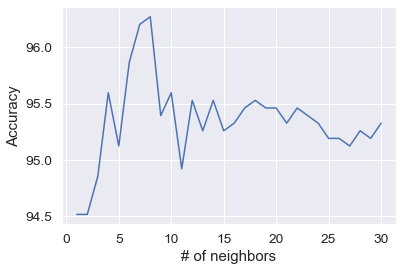

In [25]:
# without cross validation , with parameter tuning

plt.plot(kvalues2,accscr2)
plt.xlabel("# of neighbors")
plt.ylabel("Accuracy")
plt.show()

Accuracy is 0.928710561041932 when K equals to 1
Accuracy is 0.928710561041932 when K equals to 2
Accuracy is 0.9433515264495351 when K equals to 3
Accuracy is 0.9456574391060677 when K equals to 4
Accuracy is 0.9490438773132948 when K equals to 5
Accuracy is 0.9501299085713724 when K equals to 6
Accuracy is 0.9520230760342867 when K equals to 7
Accuracy is 0.9539210167688623 when K equals to 8
Accuracy is 0.9536470753595301 when K equals to 9
Accuracy is 0.9546003606041793 when K equals to 10
Accuracy is 0.9541907349796925 when K equals to 11
Accuracy is 0.955818589295262 when K equals to 12
Accuracy is 0.9552749311678352 when K equals to 13
Accuracy is 0.9567671007706711 when K equals to 14
Accuracy is 0.9556825373695099 when K equals to 15
Accuracy is 0.9569033370493003 when K equals to 16
Accuracy is 0.9560897768557448 when K equals to 17
Accuracy is 0.9573098421094979 when K equals to 18
Accuracy is 0.9558191408611576 when K equals to 19
Accuracy is 0.9581241367290904 when K equal

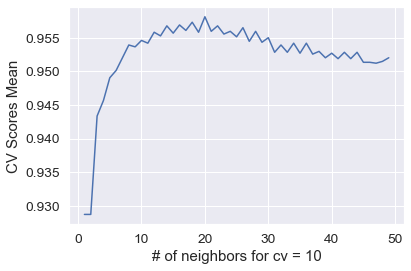

In [30]:
# with parameter tuning , with cross validation
# best values can be seen here , cv = 10

kneigh = []
cvscores = []
for j in range(1,50):
    neigh_cv = KNeighborsClassifier(n_neighbors = j,weights = 'distance',p=2)
    score = cross_val_score(neigh_cv,X,y,cv=10)
    kneigh.append(j)
    cvscores.append(score.mean())
    print("Accuracy is",cvscores[j-1],"when K equals to",kneigh[j-1])
plt.plot(kneigh,cvscores)
plt.xlabel("# of neighbors for cv = 10")
plt.ylabel("CV Scores Mean")
plt.show()
    

In [41]:
# gaussian naive bayes report

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
y_predd = model.predict(X_test)
print(classification_report(y_test,y_predd))
print(confusion_matrix(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       620
           1       0.88      0.86      0.87       856

    accuracy                           0.85      1476
   macro avg       0.85      0.85      0.85      1476
weighted avg       0.85      0.85      0.85      1476

[[521  99]
 [119 737]]


In [43]:
score_nb = cross_val_score(model,X,y,cv=10)
print(score_nb.mean())

0.8372319399077093


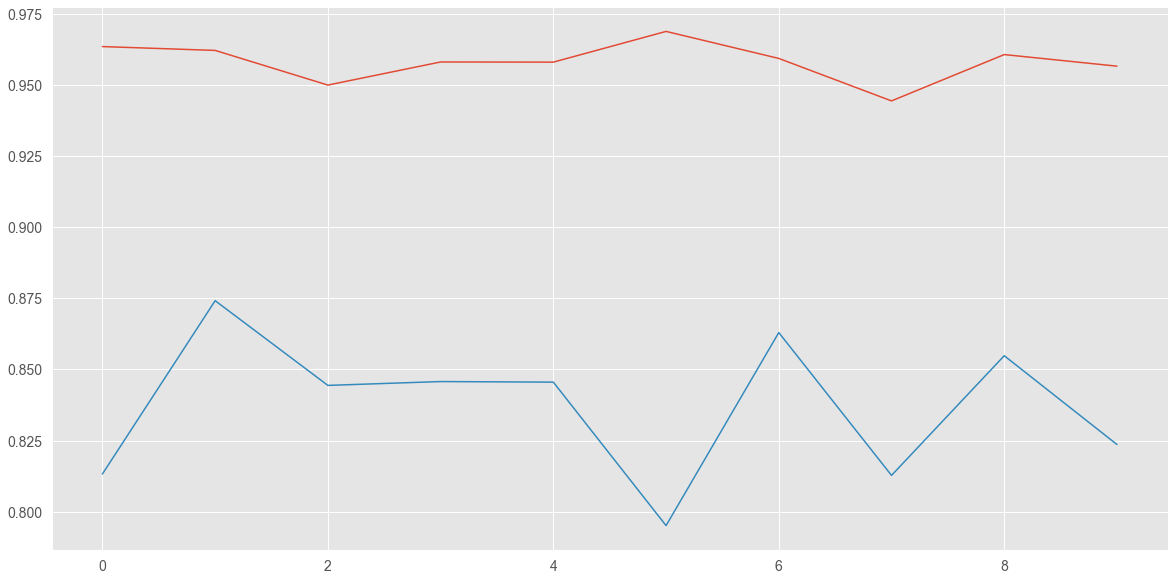

In [62]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(cv_scores10) # 10-fold kNN
plt.plot(score_nb) #10 fold Gaussian NB
plt.style.use('ggplot')
plt.show()